linear regression 

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Specify the path to your Excel file
file_path = "C:/Users/user/Desktop/summer 2024/Capstone project/lac_marketing_dataset_20240603.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Drop unnecessary columns
columns_to_remove = ['Date', 'Time of Day', 'Campaign ID', 'CTR (%)', 'CPC ($)', 'CPA ($)', 'CPS ($)', 'A/S', 'ROAS', 'ROI (%)']
df = df.drop(columns=columns_to_remove)

# Encode categorical columns
categorical_columns = ['Social Media/Platform', 'Industry', 'Location', 'City', 'State/Province', 'Engagement Type', 'Device Type', 'Content/Ad Format']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Define the target variable and features
target = 'CPL ($)'
if target not in df.columns:
    raise KeyError(f"Target column '{target}' is missing from the DataFrame.")
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Make predictions
y_pred = model_1.predict(X_test)

# Calculate error values
mae_1 = mean_absolute_error(y_test, y_pred)
mse_1 = mean_squared_error(y_test, y_pred)
rmse_1 = mse_1 ** 0.5
r2_1 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae_1}")
print(f"Mean Squared Error (MSE): {mse_1}")
print(f"Root Mean Squared Error (RMSE): {rmse_1}")
print(f"R-squared (R²): {r2_1}")


Mean Absolute Error (MAE): 10.3749127487223
Mean Squared Error (MSE): 232.08661936906978
Root Mean Squared Error (RMSE): 15.23438936646526
R-squared (R²): 0.6754795160284253


decision tree

In [45]:
from sklearn.tree import DecisionTreeRegressor


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor
model_2 = DecisionTreeRegressor(random_state=42)
model_2.fit(X_train, y_train)

# Make predictions
y_pred = model_2.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict the target variable
y_pred = model_2.predict(X_test)

# Evaluate the model
mae_2 = mean_absolute_error(y_test, y_pred)
mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = np.sqrt(mse)
r2_2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_2}")
print(f"Mean Squared Error (MSE): {mse_2}")
print(f"Root Mean Squared Error (RMSE): {rmse_2}")
print(f"R-squared (R²): {r2_2}")



Mean Absolute Error (MAE): 0.6776319286414767
Mean Squared Error (MSE): 1.7042439048780669
Root Mean Squared Error (RMSE): 0.9077260893181628
R-squared (R²): 0.9976170015388214


neural networks

In [25]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the data
file_path = "C:/Users/user/Desktop/summer 2024/Capstone project/lac_marketing_dataset_20240603.xlsx"
df = pd.read_excel(file_path)

# Drop unnecessary columns including those to be removed
columns_to_remove = ['Date', 'Time of Day', 'Campaign ID', 'CTR (%)', 'CPC ($)', 'CPA ($)', 'CPS ($)', 'A/S', 'ROAS', 'ROI (%)']
df = df.drop(columns=columns_to_remove)

# Encode categorical columns
categorical_columns = ['Social Media/Platform', 'Industry', 'Location', 'City', 'State/Province', 'Engagement Type', 'Device Type', 'Content/Ad Format']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Define the target variable and features
target = 'CPL ($)'
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (could be 'val_accuracy' or any other metric)
    patience=7,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback
)

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1007.2524 - val_loss: 182.8824
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 133.6487 - val_loss: 113.3466
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 100.0149 - val_loss: 95.8941
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 83.9389 - val_loss: 76.9260
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64.8788 - val_loss: 58.9725
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 47.2803 - val_loss: 43.8033
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37.4557 - val_loss: 33.1280
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.8067 - val_loss: 26.7289
Epoch 9/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.6305 - val_loss: 20.4522
Epoch 10/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.1974 - val_loss: 15.2419
Epoch 11/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.8295 - val_loss: 12.9000
Epoch 12/50
295/295 ━━━━

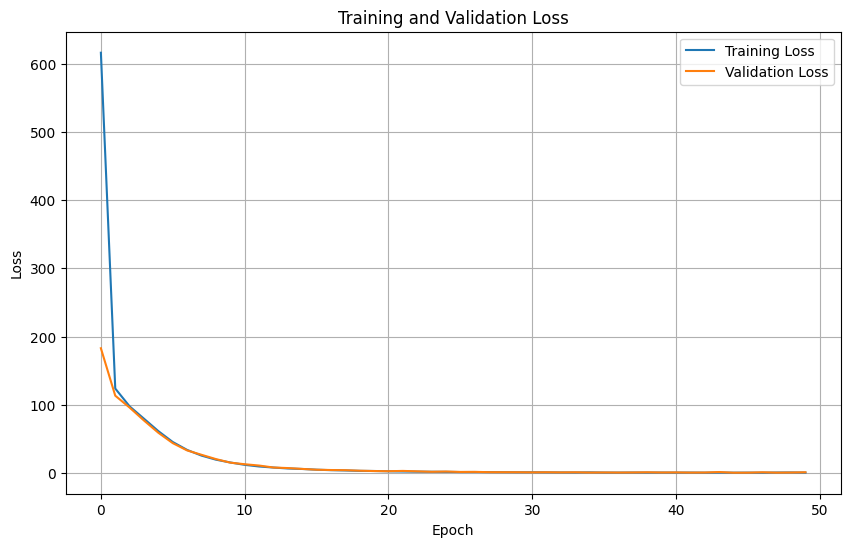

In [32]:
import matplotlib.pyplot as plt

# Extract loss values from the history
loss = history.history['loss']
val_loss = history.history.get('val_loss', [])  # Some models might not have validation loss

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
if val_loss:
    plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5245
Test Loss: 0.47020623087882996


In [46]:
# Predict using the model
predictions = model.predict(X_test)

# # # Print the predictions
# for i in range(len(predictions)):
#     print(f'Predicted: {predictions[i][0]}, Actual: {y_test.iloc[i]}')

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [35]:
import numpy as np
# Assuming predictions are probabilities, threshold them to get class labels
predictions = (predictions > 0.5).astype(int)

# If predictions are in a 2D array, flatten it
predictions = predictions.flatten()

# Ensure y_test is a numpy array or list of integers
y_test = y_test.to_numpy().astype(int) if not isinstance(y_test, (np.ndarray, list)) else y_test


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the model
predictions = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared (R²)
r2 = r2_score(y_test, predictions)
print(f'R-squared (R²): {r2}')



93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 0.6660019604127798
Mean Squared Error (MSE): 0.8239666532288453
Root Mean Squared Error (RMSE): 0.9077260893181628
R-squared (R²): 0.9988479614257812


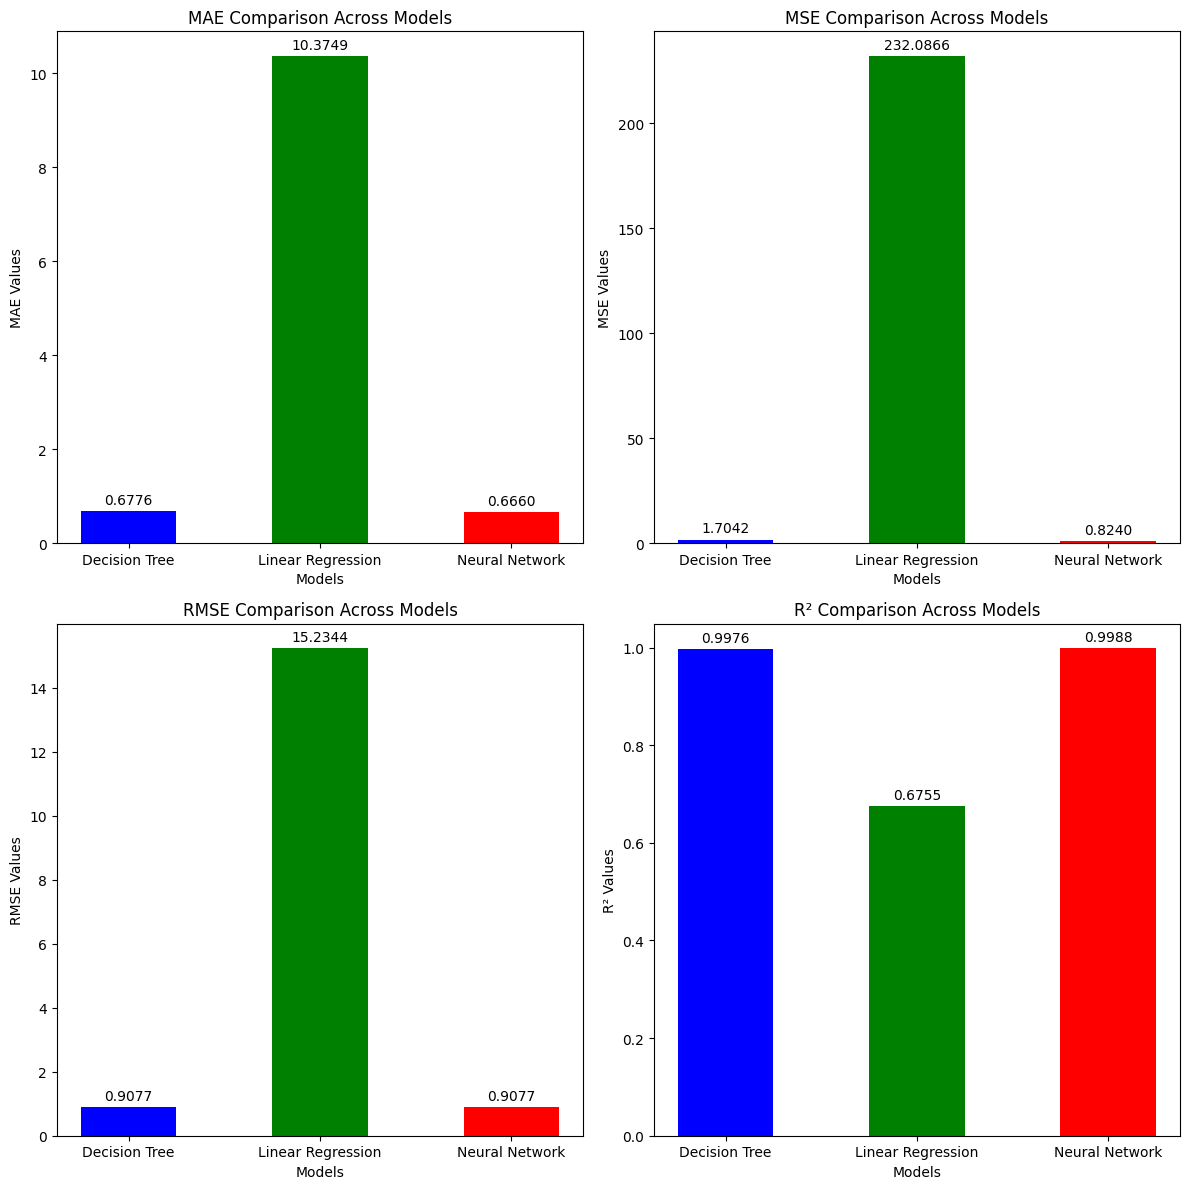

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
metrics = {
    'MAE': {'Decision Tree': mae_2, 'Linear Regression': mae_1, 'Neural Network': mae},
    'MSE': {'Decision Tree': mse_2, 'Linear Regression': mse_1, 'Neural Network': mse},
    'RMSE': {'Decision Tree': rmse_2, 'Linear Regression': rmse_1, 'Neural Network': rmse},
    'R²': {'Decision Tree': r2_2, 'Linear Regression': r2_1, 'Neural Network': r2}
}

# Models for x-axis
models = list(metrics['MAE'].keys())

# Create a square figure with 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each metric
for ax, (metric, values) in zip(axes, metrics.items()):
    # Bar positions and values
    x = np.arange(len(models))
    bar_width = 0.5
    bars = ax.bar(x, values.values(), bar_width, color=['blue', 'green', 'red'])
    
    # Adding labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel(f'{metric} Values')
    ax.set_title(f'{metric} Comparison Across Models')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    
    # Adding value labels on top of the bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom')
    
    add_value_labels(bars)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


feature analysis and cpl optimization 

PermutationExplainer explainer: 11789it [24:46,  7.91it/s]                                                             


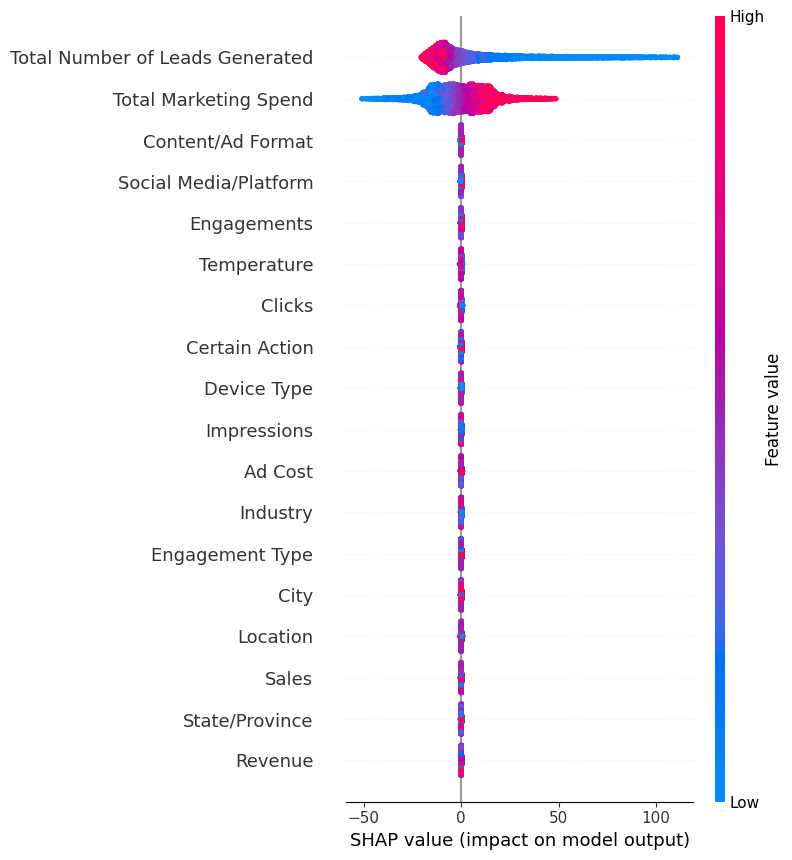

In [39]:
import shap

# Convert X_train back to a DataFrame to retain column names
X_train_df = pd.DataFrame(X_train, columns=features)

# Initialize the SHAP explainer with the trained model
explainer = shap.Explainer(model, X_train_df)

# Calculate SHAP values for the training set
shap_values = explainer(X_train_df)

# Plot the feature importance with real feature names
shap.summary_plot(shap_values, X_train_df, feature_names=X_train_df.columns)

In [37]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential

# Calculate average CPL
average_cpl = y.mean()

def predict_cpl_with_feature_change(feature_name, new_value):
    # Make a copy of the original features DataFrame
    X_copy = X.copy()
    
    # Set the feature to the new value
    X_copy[feature_name] = new_value
    
    # Apply scaling to the modified feature DataFrame
    X_scaled = scaler.transform(X_copy)
    
    # Predict CPL using the scaled feature DataFrame
    predicted_cpl = model.predict(X_scaled)
    
    return predicted_cpl

# Example usage
feature_to_change = 'Clicks'  # The feature you want to change
new_feature_value = 100       # New value for the feature

# Predict CPL with the new feature value
predicted_cpl = predict_cpl_with_feature_change(feature_to_change, new_feature_value)

# Calculate the average CPL
average_cpl = y.mean()

# Calculate the difference
difference = predicted_cpl.mean() - average_cpl

print(f'Predicted CPL with {feature_to_change} set to {new_feature_value}: {predicted_cpl.mean()}')
print(f'Average CPL: {average_cpl}')
print(f'Difference between new CPL and average CPL: {difference}')


461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted CPL with Clicks set to 100: 28.452306747436523
Average CPL: 28.29186894677107
Difference between new CPL and average CPL: 0.1604378006654521


In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the target CPL reduction
target_reduction = 2
target_cpl = average_cpl - target_reduction

# Define a function to calculate the average change required for each feature
def calculate_feature_changes(target_cpl, features, X, model, scaler):
    # Calculate the baseline CPL
    baseline_cpl = model.predict(scaler.transform(X)).mean()
    
    # Placeholder for feature changes
    feature_changes = {}
    
    for feature in features:
        # Create a copy of the dataset
        X_copy = X.copy()
        
        # Increase the feature value slightly
        increment = 1e-1  # Larger increment for better sensitivity
        X_copy[feature] = X_copy[feature] + increment
        
        # Predict CPL with the adjusted feature
        baseline_predicted_cpl = model.predict(scaler.transform(X))
        adjusted_predicted_cpl = model.predict(scaler.transform(X_copy))
        
        # Calculate the change in CPL
        change_in_cpl = adjusted_predicted_cpl.mean() - baseline_predicted_cpl.mean()
        
        if change_in_cpl != 0:
            # Calculate the required change in feature to achieve the target reduction
            feature_changes[feature] = (target_reduction / change_in_cpl) * increment
        else:
            # Handle cases where no change in CPL is observed
            feature_changes[feature] = np.nan  # or a large value if preferred
    
    return feature_changes

# Continuous features to be optimized (excluding categorical features)
continuous_features = [col for col in X.columns if col not in categorical_columns]

# Calculate feature changes
feature_changes = calculate_feature_changes(target_cpl, continuous_features, X, model, scaler)

# Print results
print(f'Average required changes for each feature to achieve target CPL reduction:')
for feature, change in feature_changes.items():
    if np.isnan(change):
        print(f'{feature}: No significant change detected')
    else:
        print(f'{feature}: Change by {change}')

print(f'Target CPL: {target_cpl}')
print(f'Average CPL: {average_cpl}')
print(f'Difference from Average CPL: {target_reduction}')


461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Average required changes for each feature to achieve target CPL reduction:
Impressions: Change by -52428.8
Clicks: Change by -2995.93142857